IPython Notebook Tutorial
============

*Prepared by Davis Engeler.*

This tutorial will walk you through the process of setting up and getting started with IPython Notebook. Let's start with a little explanation of what [IPython Notebook](http://ipython.org/notebook.html) is and how it will be useful for us.

> The IPython Notebook is a web-based interactive computational environment where you can combine code execution, text, mathematics, plots and rich media into a single document. These notebooks are normal files that can be shared with colleagues, converted to other formats such as HTML or PDF, etc. You can share any publicly available notebook by using the IPython Notebook Viewer service which will render it as a static web page. This makes it easy to give your colleagues a document they can read immediately without having to install anything.

**To sum it up**, IPython Notebook is a beautiful way to create clean and clear documents and reports for our Big Data analytics with Spark. Alongside live code snippets, Notebook supports [Markdown](http://en.wikipedia.org/wiki/Markdown) for text formatting. *Markdown* is a great syntax to learn for writing Wiki-like documents.

IPython Notebook runs as a server and does not necessarily need to be run locally. We will be using it through the browser. *For example:* You could set up Notebook on an EC2 instance and access it through a web address to quickly analyze a large data set on the instance. Since the code in the documents are live, you can have a nicely formatted document with graphs that update along with the data. It's pretty cool.

***[Click here](https://www.youtube.com/watch?v=QduNTe3LFbs) to check out the video that goes along with the tutorial.***

## Section A...

Before you start, let's ensure that you have a few things ready to go.

1. **Ubuntu:** You will need to have [Ubuntu](http://www.ubuntu.com/download) installed for this tutorial. A virtual machine is convenient, but performance will be much better if you install the OS to a different partition on your local hard drive. I will be using Ubuntu in this tutorial, but it should work the same on any other debian Linux distribution. These types of tools should work for other Unix based systems (like OS X), but there may be significant differences during setup.
1. **Java:** Java is necessary to run most of this stuff, so be sure you have it installed. The easiest method is to isntall it through `apt-get` so your PATH is update automatically. 
1. **Spark:** If you haven't yet, [download Spark](https://spark.apache.org/downloads.html) and set it up on your Ubuntu machine. I have installed mine into `~/.spark` and suggest doing something similar. If you have already installed Spark to a different location, just keep that in mind when I mention Spark directories later in the guide.
1. **Sample Data Set:** During this tutorial, we will go through an example analysis of a sample *MovieLens 100k* dataset. Go ahead and start [download the data set](http://files.grouplens.org/datasets/movielens/ml-100k.zip). Once it's finished downloading, extract it somewhere that you will remember for our example (I would suggest somewhere like `~/Desktop/ml-100k/` for now).
1. **Anaconda Installer:** [Download this installer script](http://continuum.io/downloads) to make our lives easier. It includes most of the dependencies that we need for IPython Notebook. *Once the script is installed we will be ready to continue.*

## Section B...

### 1: Install Anaconda

Now that the *Anaconda Installer script* has finished downloading, we need to start it. It may take some time to get everything installed. 

1. **Open up Terminal** (*hint: press* `Ctrl+Alt+T` *to quickly open the Terminal*)
1. **Use the `cd` command** to navigate to the location of the `Anaconda-x.x.x-Linux-x86_64.sh` file you just downloaded.
        
        cd ~/Downloads/
        
1. **Run the script** with the `sudo sh` command. *(When typing the file name, use the Tab key to automatically fill in the rest. If that doesn't work, type a few more characters and try again. If you literally type "x.x.x", you should rethink your life.)*
            
        sudo sh Anaconda-x.x.x-Linux-x86_64.sh
            
1. **Near the end of the installation process**, the script will ask if you want to add the path variables to `bashrc`. I'm not sure if this will set them up correctly, so it's up to you. Either way, I will go over the proper setup of the path variables later on.


### 2: Set Up Path Variables

We need to key path variables set up for IPython Notebook to work properly.

1. **Edit your `~/.bashrc` file**
        
        sudo gedit ~/.bashrc
        
1. **You want to be sure that the file contains these lines.** Your *first line needs to be set to wherever your Spark is installed*. Everything after the equal sign on the first line should be set to your spark folder. For example: '`/home/davis/documents/spark`'. However, since my Spark is in '`~/.spark`', I'm using '`$HOME/.spark`'

        export SPARK_HOME=$HOME/.spark 
        export PYTHONPATH=$SPARK_HOME/python/lib/py4j-0.8.2.1-src.zip
        export PYTHONPATH=$SPARK_HOME/python/:$PYTHONPATH
        export ANACONDAPATH=$HOME/anaconda/bin
        export PATH=$ANACONDAPATH:$SPARK_HOME:$PYTHONPATH:$PATH
        
1. **Save the file** and quit gedit.

### 3: Configure IPython

1. **Create an IPython profile** to use with PySpark
        
        ipython profile create pyspark
        
1. **Create a password** for the profile
        
        python -c 'from IPython.lib import passwd; print passwd()' > ~/.ipython/profile_pyspark/nbpasswd.txt
        
1. **Edit the file** '`~/.ipython/profile_pyspark/ipython_notebook_config.py`'
        
        sudo gedit ~/.ipython/profile_pyspark/ipython_notebook_config.py
        
1. For our purposes, you can **remove everything in the file and replace it with the following.** *You may want to look into this configuration later when you're ready to use this in practice. Hosting on all IPs isn't the best...*

        import os
        from os.path import expanduser
        home = expanduser("~")
        c = get_config()
        c.NotebookApp.ip = '*'
        c.NotebookApp.open_browser = False
        c.NotebookApp.port = 8880
        WORKINGDIR = home + "/.ipython/profile_pyspark/working-dir"
        if not os.path.exists(WORKINGDIR):
           os.makedirs(WORKINGDIR)
        c.NotebookManager.notebook_dir = WORKINGDIR
        PWDFILE = home + "/.ipython/profile_pyspark/nbpasswd.txt"
        c.NotebookApp.password = open(PWDFILE).read().strip()
        
1. **Create and edit** the file `~/.ipython/profile_pyspark/startup/00-pyspark-setup.py`
        
        sudo gedit ~/.ipython/profile_pyspark/startup/00-pyspark-setup.py
        
1. **Paste this in** and save the file. Close gedit.

        import os
        import sys

        spark_home = os.environ.get('SPARK_HOME', None)
          if not spark_home:
              raise ValueError('SPARK_HOME environment variable is not set')
        sys.path.insert(0, os.path.join(spark_home, 'python'))
          sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.8.2.1-src.zip'))
        execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))
        
1. **Start up IPython Notebook.**
        
        ipython notebook --profile=pyspark
        
## Section C...











MovieLens 100k Data Set
===========================

This is an example iPython Notebook for the MovieLens 100K Data Set.

Go ahead and get our environment set up to play with the set.

In [1]:
import os
import sys
from pyspark import SparkContext
from matplotlib.pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

app_name = "MovieLens"
sc = SparkContext("local", app_name)

user_data = sc.textFile("/home/davis/Desktop/ml-100k/u.user")

Let's take a look at the first element of user_data to see how it's structured...

In [2]:
user_data.first()

u'1|24|M|technician|85711'

Let's **transform the data** by splitting each line around the `|` character. This will give us an RDD where each record is a Python list that contains the user ID, age, gender, occupoation, and zip code fields.

In [3]:
user_fields = user_data.map(lambda line: line.split("|"))
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print "Users: %d, genders: %d, occupations: %d, zipcodes: %d" % (num_users, num_genders, num_occupations, num_zipcodes)

Users: 943, genders: 2, occupations: 21, zipcodes: 795


Let's create a histogram to analyze the distribution of user ages using *matplotlib*'s `hist` function.

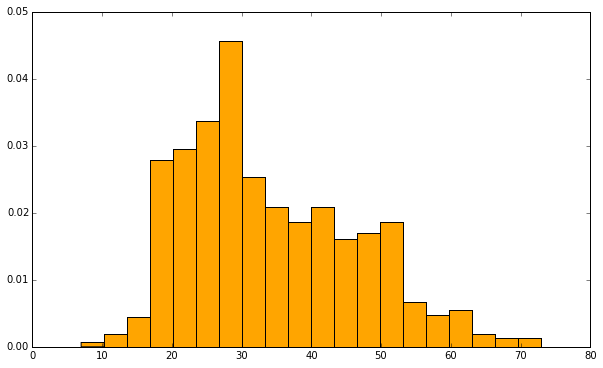

In [4]:
ages = user_fields.map(lambda x: int(x[1])).collect()
hist(ages, bins=20, color='orange', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 6)

It looks like most of the MovieLens users are somewhat skewed towards younger viewers. A large number of users are between the ages of about 15 and 35. Let's start to explore the relative frequencies of the various occupations of our users. We can do this with the following code snippet.

1. We will use `MapReduce` to count the occurences of each occupation in the dataset.
1. We will use `matplotlib` to display a bar chart of occupation counts using the `bar` function

*Since part of our data is the descriptions of textual occupation, we will need to manipulate it a little bit to get it to work with the `bar` function.*

In [5]:
# .map -> .reduceByKey -> .collect
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()

x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

Once we have collected the RDD of counts per occupation, we will convert it into two arrays for the x axis (*the occupations*) and the y axit (*the counts*) of our chart. The `collect` function returns the count data to us in no particular order. We need to sort the count data so that our bar chart is ordered from the lowest to the highest count.

We can do this by first creating two `numpy` arrays and then using the `argsort` method of `numpy` to select the elements from each array, ordered by the count data in an ascending fashion. Notice that this is where we will sort both the x and y axis arrays by the y axis (the counts).

In [6]:
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

Once we have the x and y axis data for our chart, we will create the bar chart with the occupations as labels on the x axis and the counts as the values on the y axis. We will also add a few lines, such as the `plt.xticks(rotation=30)` code to display a better looking chart.

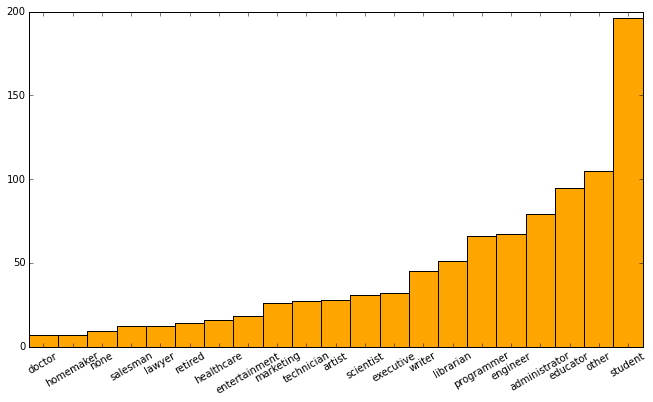

In [7]:
pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, width, color='orange')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 6)

It looks like our most prevalent occupations are **student, other, educator, administrator, engineer,** and **programmer**.

Spark provides a convenience method on RDDs called `countByValue`; this method counts the occurances of each unique value in the RDD and returns it to the driver as a Python `dict` method (or a Scala or Java `Map` method). We can create the `count_by_occupations` variable using the following method.

In [8]:
count_by_occupation2 = user_fields.map(lambda fields: fields[3]).countByValue()
print "Map-reduce approach:"
print dict(count_by_occupation2)
print ""
print "countByValue approach:"
print dict(count_by_occupation)

Map-reduce approach:
{u'administrator': 79, u'retired': 14, u'lawyer': 12, u'healthcare': 16, u'marketing': 26, u'executive': 32, u'scientist': 31, u'student': 196, u'technician': 27, u'librarian': 51, u'programmer': 66, u'salesman': 12, u'homemaker': 7, u'engineer': 67, u'none': 9, u'doctor': 7, u'writer': 45, u'entertainment': 18, u'other': 105, u'educator': 95, u'artist': 28}

countByValue approach:
{u'administrator': 79, u'executive': 32, u'retired': 14, u'doctor': 7, u'entertainment': 18, u'marketing': 26, u'writer': 45, u'none': 9, u'healthcare': 16, u'scientist': 31, u'homemaker': 7, u'student': 196, u'educator': 95, u'technician': 27, u'librarian': 51, u'programmer': 66, u'artist': 28, u'salesman': 12, u'other': 105, u'lawyer': 12, u'engineer': 67}


*Notice that the results are the same for both approaches.*

### Exploring the movie dataset

Next, let's investigate a few properties of the movie catalogue. We can inspect a row of the movie data file just like we did for the user data before, then count the number of movies.

In [9]:
movie_data = sc.textFile("/home/davis/Desktop/ml-100k/u.item")

# Let's print out the first one in the list to see how it's formatted
print movie_data.first()
print "" #new line

num_movies = movie_data.count()
print "Total Movies: %d" % num_movies

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0

Total Movies: 1682


In the same manner as we did for user ages and occupations earlier, we can plot the distribution of movie age (*release date*) relative to the current date (*NOTE: for this data set, the current year is 1998*).

In the following code block, we can see that we need a small function called `convert_year` to handle errors in the parsing of the `release date` field. This is due to some bad data in one line of the movie data.

In [10]:
def convert_year(x):
    try:
      return int(x[-4:])
    except:
      return 1900 # there is a 'bad' data point with a blank year, so we set it to 1900 and will filter it out later

Once we have our utility function to parse the year of release, we can apply it to the movie data using a `map` transformation and collect the results.

In [11]:
movie_fields = movie_data.map(lambda lines: lines.split("|"))
years = movie_fields.map(lambda fields: fields[2]).map(lambda x: convert_year(x))

Since we have assigned the value 1900 to any error in parsin, we can filter these bad value out of the resulting data using Spark's `filter` transformation.

In [12]:
years_filtered = years.filter(lambda x: x != 1900)

This is a good example of how real-world datasets can often be messy and require a more in-depth approach to parsing data. In fact, this also illustrates why data exploration is so important, as many of these issues in data integrity and quality are picked up during this phase.

After filtering out bad data, we will transform the list of movie release years into movie ages by subtracting the current year, use `countByValue` to computer the counts for each movie age, and finally plot our histogram of movies ages (again, using the `hist` function where the `values` variable are the values of the result from `countByValue` and the `bins` variable are the keys).

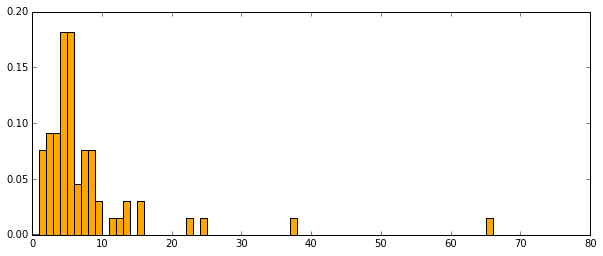

In [13]:
movie_ages = years_filtered.map(lambda yr: 1998-yr).countByValue()
values = movie_ages.values()
bins = movie_ages.keys()
hist(values, bins=bins, color='orange', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4)

This shows us that move of the movies were released in the last few years before 1998.